# Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [1]:
#Importing necessary libraries
import numpy as np   
import pandas as pd 
import copy
import os
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
%matplotlib inline 
import math
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [2]:
# Importing the data
df_holiday = pd.read_csv('Holiday_Package.csv')

In [3]:
df_holiday_copy = df_holiday.copy()

In [4]:
# DataFrame Head information
df_holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [5]:
# Shape of the data (Rows,Columns)
df_holiday.shape

(872, 8)

In [6]:
# Since the first column is not significant in the analysis, its removed from the dataframe
df_holiday.drop(df_holiday.columns[0], axis=1,inplace=True)

In [7]:
df_holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [8]:
# DataFrame Information
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [9]:
# DataFrame Description
df_holiday.describe(include = 'all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [10]:
# Duplicates Check
print("Number of Duplicate rows in the Dataset:",df_holiday.duplicated().sum())

Number of Duplicate rows in the Dataset: 0


In [11]:
#skewness check
skew = df_holiday.skew() 
print("Skewness of the Dataset:\n",skew)

Skewness of the Dataset:
 Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64


In [12]:
#spread value counts for object Datatypes
print('Holliday_Package Distribution \n',df_holiday.Holliday_Package.value_counts())
print('\n')
print('foreign Distribution \n',df_holiday.foreign.value_counts())

Holliday_Package Distribution 
 no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign Distribution 
 no     656
yes    216
Name: foreign, dtype: int64


In [13]:
# Coefficient of Variation check
cv = df_holiday.std()/df_holiday.mean()
print(cv)

Salary               0.490657
age                  0.264087
educ                 0.326222
no_young_children    1.964789
no_older_children    1.105808
dtype: float64


In [14]:
df_holiday.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [15]:
# Null Values Check
df_holiday.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

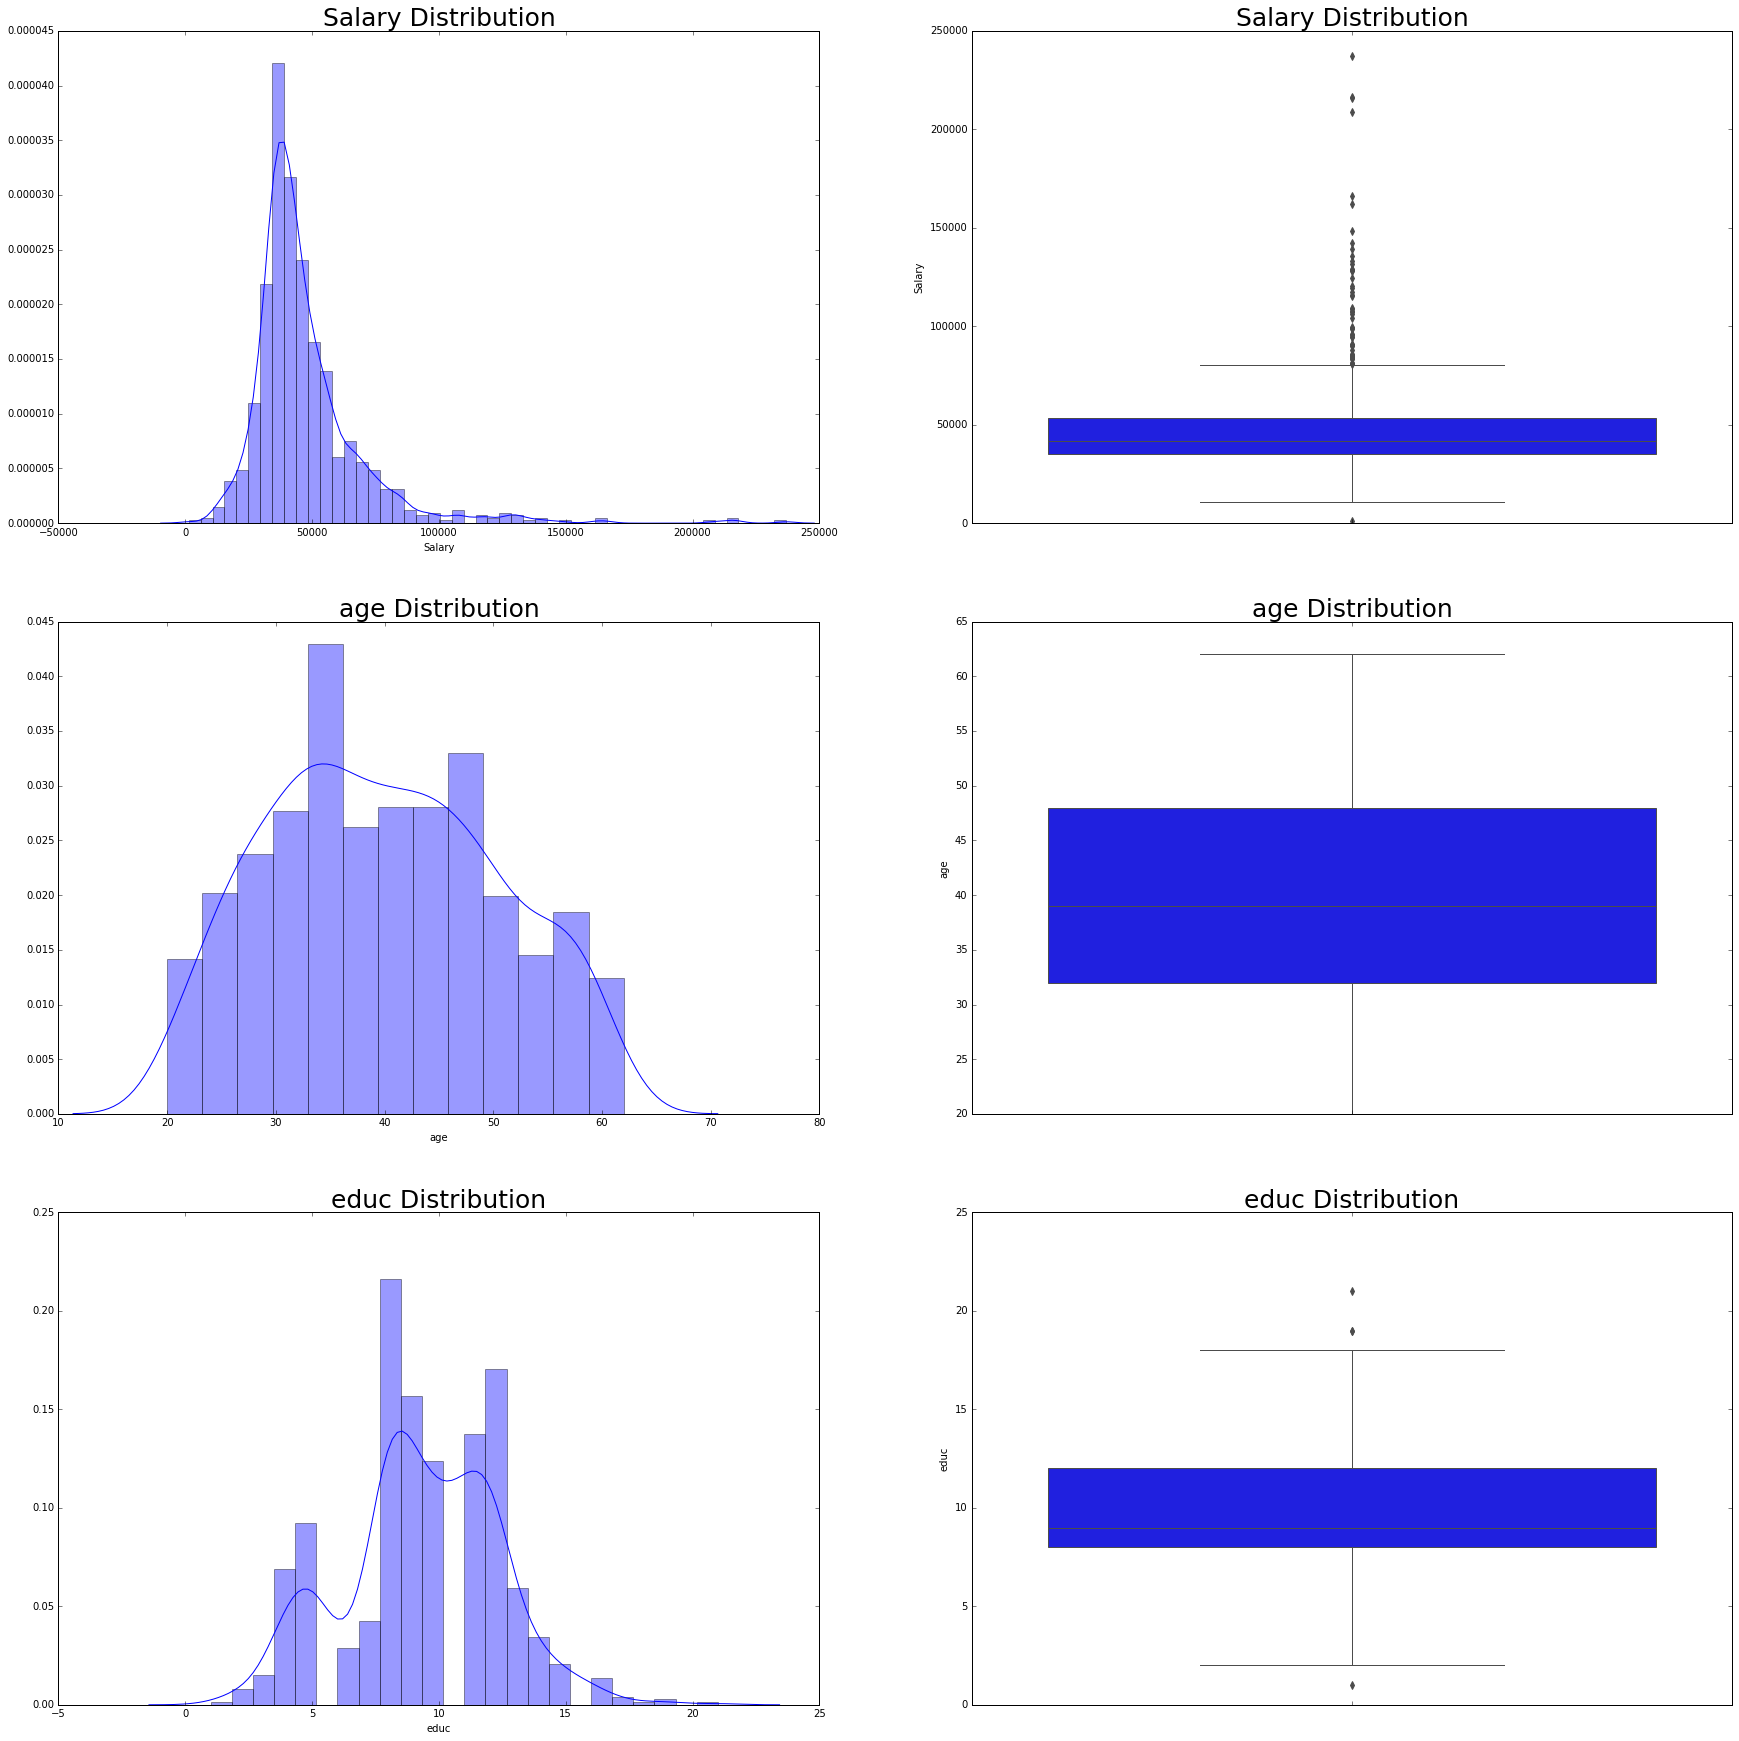

In [16]:
#univariate analysis - Distplot and Boxplot 
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(30, 30)

a = sns.distplot(df_holiday['Salary'] , ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=25)
a = sns.boxplot(df_holiday['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=25)

a = sns.distplot(df_holiday['age'] , ax=axes[1][0])
a.set_title("age Distribution",fontsize=25)
a = sns.boxplot(df_holiday['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=25)

a = sns.distplot(df_holiday['educ'] , ax=axes[2][0])
a.set_title("educ Distribution",fontsize=25)
a = sns.boxplot(df_holiday['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=25)




plt.show()

In [17]:
#covariance check
df_holiday.cov()

,Salary,age,educ,no_young_children,no_older_children
Salary,5.484340e+08,17719.779229,23218.662341,-425.752915,2895.613755
age,1.771978e+04,111.337837,-4.783024,-3.356871,-1.332573
educ,2.321866e+04,-4.783024,9.218867,0.183012,-0.119851
no_young_children,-4.257529e+02,-3.356871,0.183012,0.375610,-0.158807
no_older_children,2.895614e+03,-1.332573,-0.119851,-0.158807,1.181104


In [18]:
#correlation check
df_holiday.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


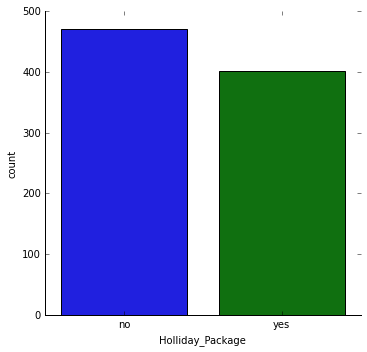

In [19]:
# Univariate Check - Holiday package vs Count
sns.catplot(x="Holliday_Package", kind="count", data=df_holiday)

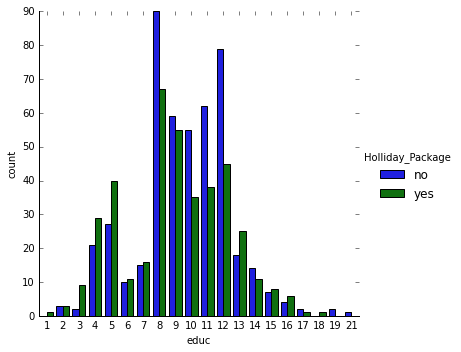

In [20]:
sns.catplot(x='educ', kind='count',data=df_holiday,hue='Holliday_Package')

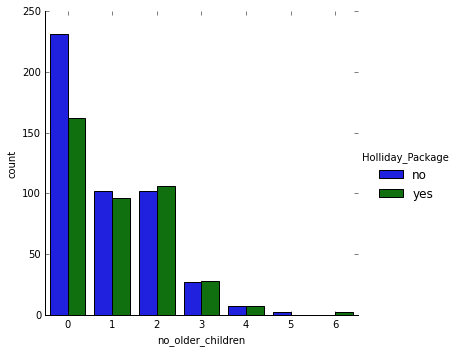

In [21]:
sns.catplot(x="no_older_children", kind="count",hue='Holliday_Package', data=df_holiday)

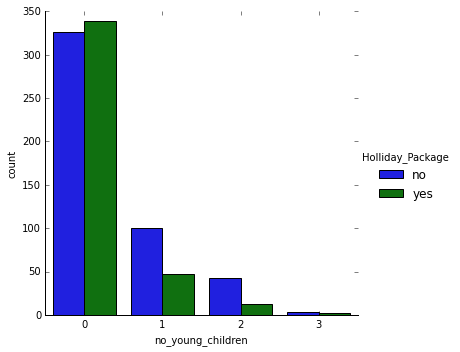

In [22]:
sns.catplot(x="no_young_children", kind="count",hue='Holliday_Package', data=df_holiday)

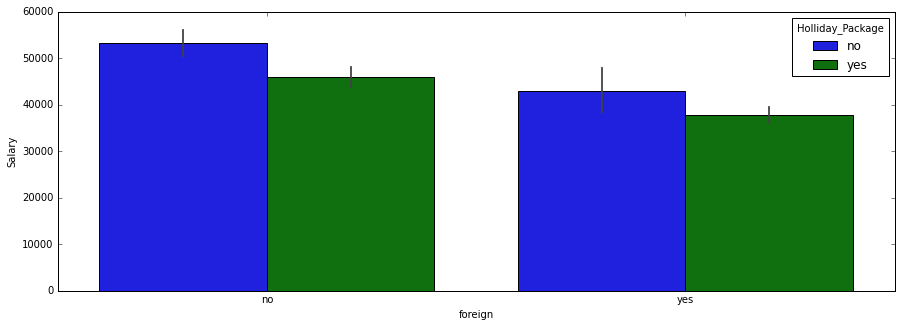

In [23]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='foreign', y='Salary', hue='Holliday_Package',data=df_holiday)


<Figure size 1080x504 with 0 Axes>

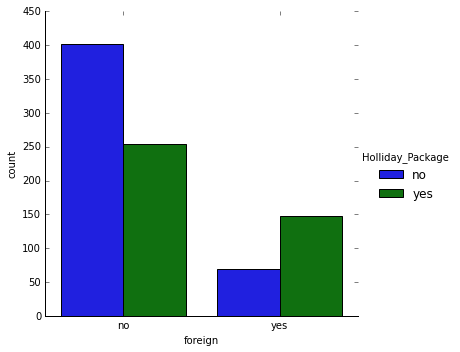

In [24]:
plt.figure(figsize=(15,7))
ax = sns.catplot(x='foreign', kind='count',data=df_holiday,hue='Holliday_Package',ax=ax)

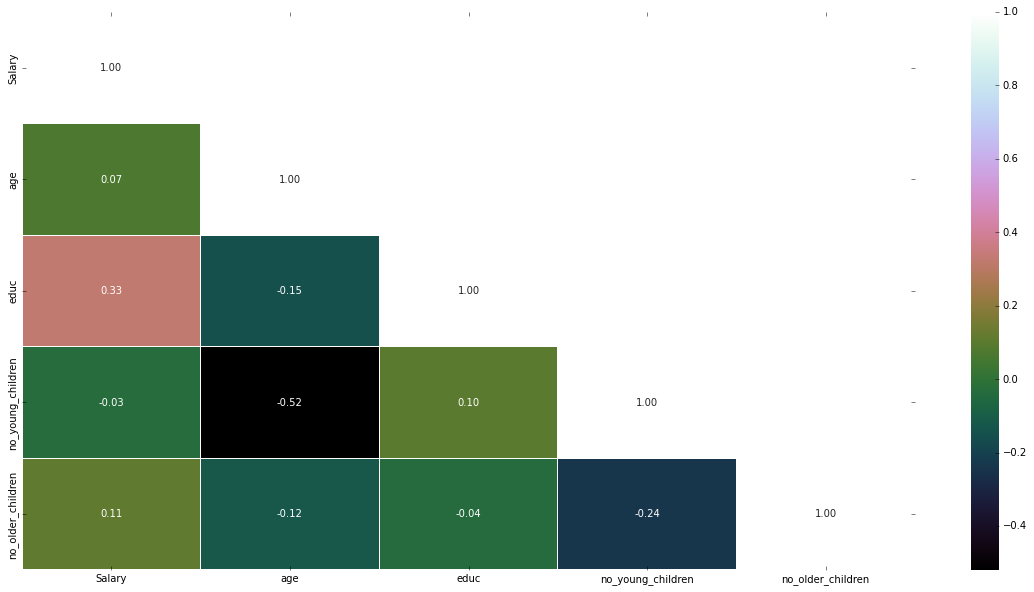

In [25]:
# Bivariate Analysis - Heatmap
fig,ax = plt.subplots(figsize=(20,10))   
sns.heatmap(df_holiday.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="cubehelix",mask=np.triu(df_holiday.corr(),+1)) 
plt.show()

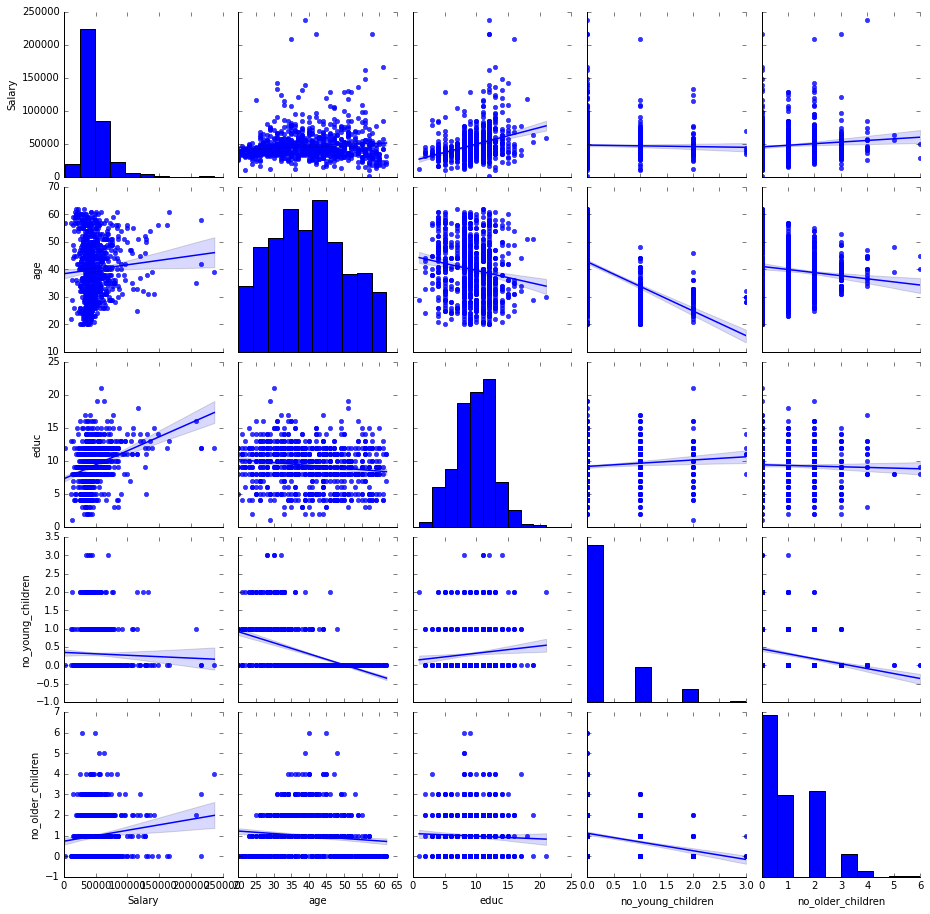

In [26]:
#Bivariate analysis - Pair plot
sns.pairplot(df_holiday, kind="reg")  
plt.show()

<AxesSubplot:xlabel='age', ylabel='Salary'>

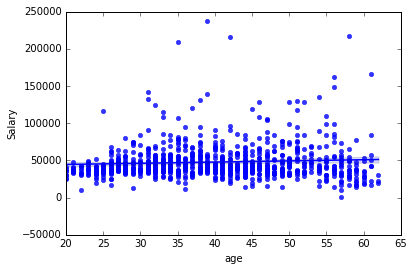

In [27]:
# Scatter Plot Age vs Salary
sns.regplot(x='age', y='Salary', data=df_holiday)  

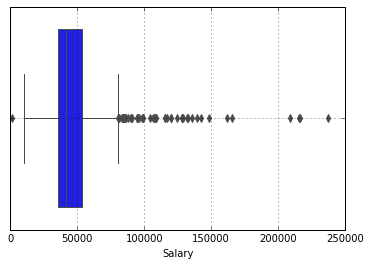

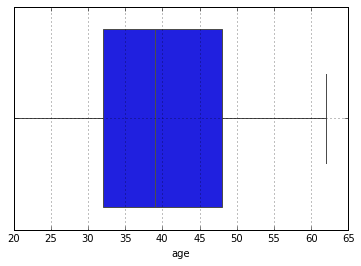

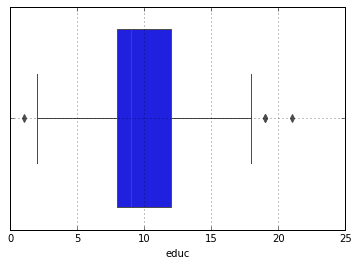

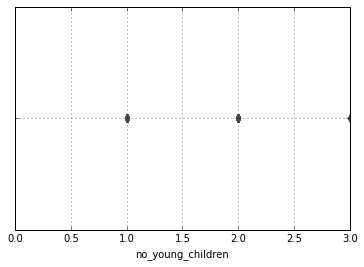

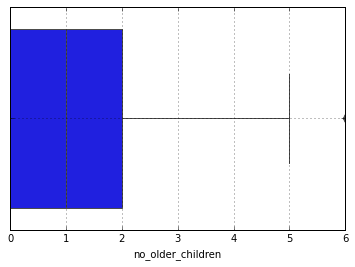

In [28]:
#Checking Boxplots
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(df_holiday[i],whis=1.5)
    plt.grid()
    plt.show();

In [29]:
#Object values spread
for feature in df_holiday.columns: 
    if df_holiday[feature].dtype == 'object': 
        print(feature)
        print(df_holiday[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [30]:
#The Target Variable spread
df_holiday.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [31]:
## Converting the 'foreign' and 'Holliday_Package' Variables into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [32]:
# Converting Foreign variable with label Encoder 
df_holiday['foreign'] = LE.fit_transform(df_holiday['foreign'])
df_holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,0
1,yes,37207,45,8,0,1,0
2,no,58022,46,9,0,0,0
3,no,66503,31,11,2,0,0
4,no,66734,44,12,0,2,0


In [33]:
df_holiday.foreign.value_counts(normalize=True)

0    0.752294
1    0.247706
Name: foreign, dtype: float64

In [34]:
# Converting Holiday Package variable with label Encoder 
df_holiday['Holliday_Package'] = LE.fit_transform(df_holiday['Holliday_Package'])
df_holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [35]:
df_holiday.Holliday_Package.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [36]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int32
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int32
dtypes: int32(2), int64(5)
memory usage: 41.0 KB


In [37]:
# Converting int32 to int64 variables
df_holiday['Holliday_Package'] = df_holiday['Holliday_Package'].astype('int64')
df_holiday['foreign'] = df_holiday['foreign'].astype('int64')


In [38]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int64
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int64
dtypes: int64(7)
memory usage: 47.8 KB


In [39]:
# Copying all the predictor variables into X dataframe
X = df_holiday.drop('Holliday_Package', axis=1)

# Copying target into the y dataframe. 
y = df_holiday['Holliday_Package']

In [40]:
# Splitting X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [41]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (610, 6)
The training set for the dependent variable: (610,)
The test set for the independent variables: (262, 6)
The test set for the dependent variable: (262,)


## Logistic Regression = > 2.2

In [42]:
#Grid Search
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'max_iter':[100,1000,10000,100000],
      'tol':[0.0001,0.00001,0.001]
     }

In [43]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [44]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000, 100000],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05, 0.001]},
             scoring='f1')

In [46]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(n_jobs=2, solver='newton-cg')


In [47]:
model_final_lr = LogisticRegression(max_iter=100, n_jobs=2, penalty='l2', solver='newton-cg',tol=0.0001)

#model_final_lr = LogisticRegression(max_iter=10000, n_jobs=2)

In [48]:
grid_search_final = GridSearchCV(estimator = model_final_lr, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [49]:
model_final_lr.fit(X_train, y_train)

LogisticRegression(n_jobs=2, solver='newton-cg')

In [50]:
# Prediction on the training set

ytrain_predict = model_final_lr.predict(X_train)
ytest_predict = model_final_lr.predict(X_test)

In [51]:
## Getting the probabilities on the test set

ytest_predict_prob=model_final_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.753599,0.246401
1,0.287308,0.712692
2,0.888743,0.111257
3,0.974783,0.025217
4,0.499096,0.500904
5,0.738768,0.261232
6,0.904156,0.095844
7,0.665797,0.334203
8,0.462652,0.537348
9,0.635633,0.364367


In [52]:
#Training Accuracy 
accuracy_train= model_final_lr.score(X_train, y_train)
accuracy_train

0.680327868852459

In [53]:
# Testing Accuracy
accuracy_test= model_final_lr.score(X_test, y_test)
accuracy_test

0.6450381679389313

In [54]:
model_final_lr.coef_

array([[-1.74325971e-05, -5.29573264e-02,  7.15032744e-02,
        -1.45907979e+00, -4.63790727e-02,  1.47623496e+00]])

In [55]:
 print("The intercept for the model is :",model_final_lr.intercept_)

The intercept for the model is : [2.24752105]


In [56]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model_final_lr.coef_[0][idx]))

The coefficient for Salary is -1.7432597120869597e-05
The coefficient for age is -0.052957326381938105
The coefficient for educ is 0.07150327439454038
The coefficient for no_young_children is -1.4590797898041745
The coefficient for no_older_children is -0.04637907273939465
The coefficient for foreign is 1.4762349604024105


Feature: 0, Score: -0.00002
Feature: 1, Score: -0.05296
Feature: 2, Score: 0.07150
Feature: 3, Score: -1.45908
Feature: 4, Score: -0.04638
Feature: 5, Score: 1.47623


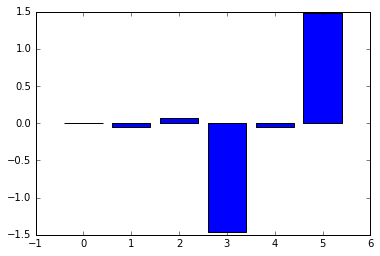

In [57]:
importance = model_final_lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [58]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head(10)

,Salary,age,educ,no_young_children,no_older_children,foreign,Holliday_Package
502,34017,57,5,0,0,0,0
729,32197,22,6,1,0,1,1
604,132984,31,12,2,0,0,0
246,72394,50,14,0,1,0,0
494,28596,49,15,0,0,0,1
760,27789,44,4,0,0,1,1
40,66588,41,12,0,2,0,1
89,75798,49,12,0,2,0,1
448,81307,56,12,0,0,0,0
355,41382,31,11,1,1,0,0


In [60]:
import statsmodels.formula.api as smf


In [61]:
log_reg = smf.logit(
  formula='Holliday_Package ~ Salary + age + educ + no_young_children + no_older_children + foreign',
  data=df_holiday) \
.fit()

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:                  0.1281
Time:                        18:18:59   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3259      0.554      4.199      0.000       1.240       3.411
Salary            -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
age                  -0.0482      0.009     -5.314      0.000      -0.066      -0.030
educ                  0.0392      0.029      1.337      0.181      -0.018       0.097
no_young_children    -1.3173      0.180     -7.326      0.000      -1.670      -0.965
no_older_children    -0.0204      0.074     -0.276      0.782      -0.165       0.124
foreign               1.3216      0.200      6.601      0.000       0.929       1.714
=====================================================================================
"""

In [62]:
# Linear Regression Equation
for i,j in np.array(log_reg.params.reset_index()):
    print('({}) * {} +'.format(round(j,5),i),end=' ')

(2.32589) * Intercept + (-2e-05) * Salary + (-0.04816) * age + (0.03917) * educ + (-1.31734) * no_young_children + (-0.02038) * no_older_children + (1.32157) * foreign + 

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## => Logistic Regression

In [63]:
# Confusion Matrix - Train
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [121, 163]], dtype=int64)

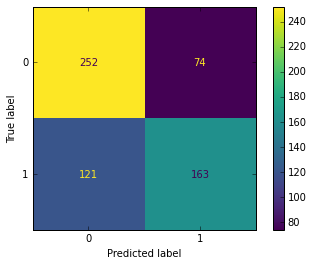

In [64]:
# Plotting Confusion Matrix - Train
plot_confusion_matrix(model_final_lr,X_train,y_train);

In [65]:
# Classification Report - Train
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       326
           1       0.69      0.57      0.63       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



In [66]:
# Precision, Recall, F1 - Train
metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)

LR_train_precision  0.69
LR_train_recall  0.57
LR_train_f1  0.63


In [67]:
# Confusion Matrix - Test
confusion_matrix(y_test, ytest_predict)

array([[102,  43],
       [ 50,  67]], dtype=int64)

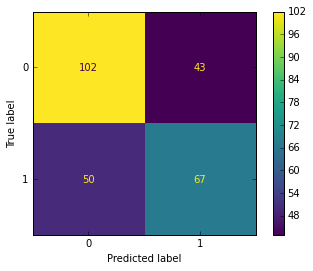

In [69]:
plot_confusion_matrix(model_final_lr,X_test,y_test);

In [72]:
#Classification Report - Test
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



In [73]:
# Precision, Recall, F1 - Test
metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)

LR_test_precision  0.61
LR_test_recall  0.57
LR_test_f1  0.59


AUC for Training Data: 0.743
AUC for testing: 0.705


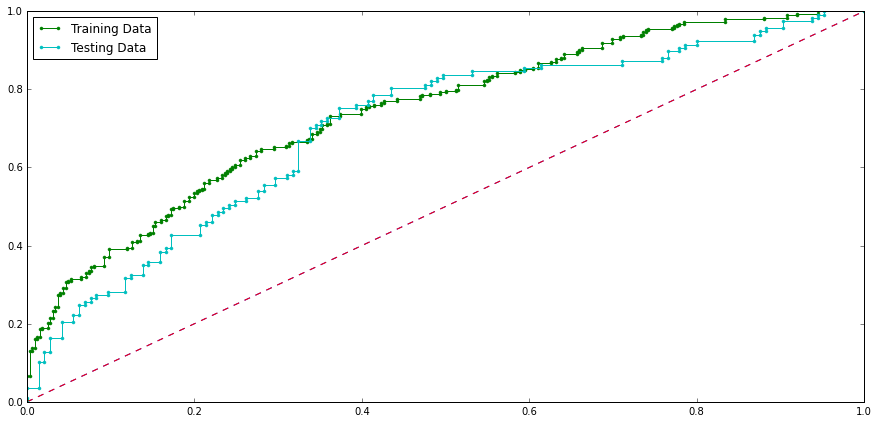

In [74]:
# predict probabilities
plt.figure(figsize=(15,7))

probs = model_final_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_lr = roc_auc_score(y_train, probs)
print('AUC for Training Data: %.3f' % train_auc_lr)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.',label = 'Training Data');





# predict probabilities
probs = model_final_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_lr = roc_auc_score(y_test, probs)
print('AUC for testing: %.3f' % test_auc_lr)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label='Testing Data')

plt.legend(loc='best')
plt.show()

## LDA => 2.2

In [75]:
df_holiday_copy.drop(df_holiday_copy.columns[0], axis=1,inplace=True)

In [76]:
df_holiday_copy.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [77]:
# Converting Foreign variable with label Encoder 
df_holiday_copy['foreign'] = LE.fit_transform(df_holiday_copy['foreign'])
df_holiday_copy.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,0
1,yes,37207,45,8,0,1,0
2,no,58022,46,9,0,0,0
3,no,66503,31,11,2,0,0
4,no,66734,44,12,0,2,0


In [78]:
# Converting Foreign variable with label Encoder 
df_holiday_copy['Holliday_Package'] = LE.fit_transform(df_holiday_copy['Holliday_Package'])
df_holiday_copy.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [79]:
# Converting int32 to int64 variables
df_holiday_copy['Holliday_Package'] = df_holiday_copy['Holliday_Package'].astype('int64')
df_holiday_copy['foreign'] = df_holiday_copy['foreign'].astype('int64')


In [80]:
# Copying all the predictor variables into X dataframe
X_lda = df_holiday_copy.drop('Holliday_Package', axis=1)

# Copying target into the y dataframe. 
y_lda = df_holiday_copy['Holliday_Package']

In [81]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y_lda, test_size=0.30 , random_state=1)

In [82]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model_final_lda =clf.fit(X_train_lda,y_train_lda)

In [83]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model_final_lda.predict(X_train_lda)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model_final_lda.predict(X_test_lda)

In [84]:
# Training Data Probability Prediction
pred_prob_train = model_final_lda.predict_proba(X_train_lda)

# Test Data Probability Prediction
pred_prob_test = model_final_lda.predict_proba(X_test_lda)

In [85]:
## Getting the probabilities on the test set

ytest_predict_prob=model_final_lda.predict_proba(X_test_lda)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.736312,0.263688
1,0.277893,0.722107
2,0.887243,0.112757
3,0.967803,0.032197
4,0.523170,0.476830
5,0.739020,0.260980
6,0.889165,0.110835
7,0.674832,0.325168
8,0.397757,0.602243
9,0.641310,0.358690


In [86]:
# Training Accuracy
accuracy_lda_train= model_final_lda.score(X_train_lda, y_train_lda)
accuracy_lda_train

0.6721311475409836

In [87]:
# Testing Accuracy
accuracy_lda_test= model_final_lda.score(X_test_lda, y_test_lda)
accuracy_lda_test

0.6412213740458015

In [88]:
print("The intercept of the model is ",model_final_lda.intercept_)

The intercept of the model is  [2.08934324]


In [89]:
for idx, col_name in enumerate(X_train_lda.columns):
    print("The coefficient for {} is {}".format(col_name, model_final_lda.coef_[0][idx]))

The coefficient for Salary is -1.475495480988139e-05
The coefficient for age is -0.054303783061133676
The coefficient for educ is 0.07596537387390201
The coefficient for no_young_children is -1.4285464350098693
The coefficient for no_older_children is -0.04635929801474013
The coefficient for foreign is 1.6239034671206718


Feature: 0, Score: -0.00001
Feature: 1, Score: -0.05430
Feature: 2, Score: 0.07597
Feature: 3, Score: -1.42855
Feature: 4, Score: -0.04636
Feature: 5, Score: 1.62390


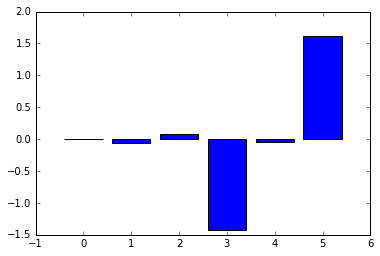

In [90]:
importance = model_final_lda.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## ## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## => LDA

In [91]:
# Confusion Matrix - Train
confusion_matrix(y_train_lda, pred_class_train)

array([[252,  74],
       [126, 158]], dtype=int64)

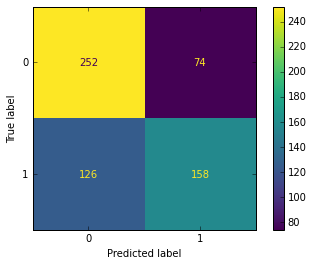

In [92]:
plot_confusion_matrix(model_final_lda,X_train_lda,y_train_lda);

In [93]:
# Classification Report - Train
print(classification_report(y_train_lda, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [94]:
# Precision, Recall, F1 - Train
metrics=classification_report(y_train_lda, pred_class_train,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lda=round(df.loc["1"][0],2)
train_recall_lda=round(df.loc["1"][1],2)
train_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_lda)
print ('LDA_train_recall ',train_recall_lda)
print ('LDA_train_f1 ',train_f1_lda)

LDA_train_precision  0.68
LDA_train_recall  0.56
LDA_train_f1  0.61


In [95]:
# Confusion Matrix - Test
confusion_matrix(y_test_lda, pred_class_test)

array([[103,  42],
       [ 52,  65]], dtype=int64)

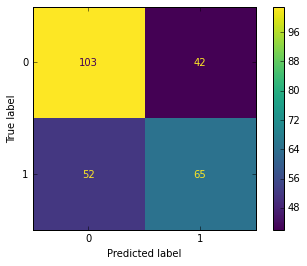

In [96]:
plot_confusion_matrix(model_final_lda,X_test_lda,y_test_lda);

In [97]:
# Classification Report - Test
print(classification_report(y_test_lda, pred_class_test))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [98]:
# Precison, Recall, F1 - Test
metrics=classification_report(y_test_lda, pred_class_test,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lda=round(df.loc["1"][0],2)
test_recall_lda=round(df.loc["1"][1],2)
test_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',test_precision_lda)
print ('LDA_train_recall ',test_recall_lda)
print ('LDA_train_f1 ',test_f1_lda)

LDA_train_precision  0.61
LDA_train_recall  0.56
LDA_train_f1  0.58


AUC for Training Data: 0.742
AUC for testing Data: 0.703


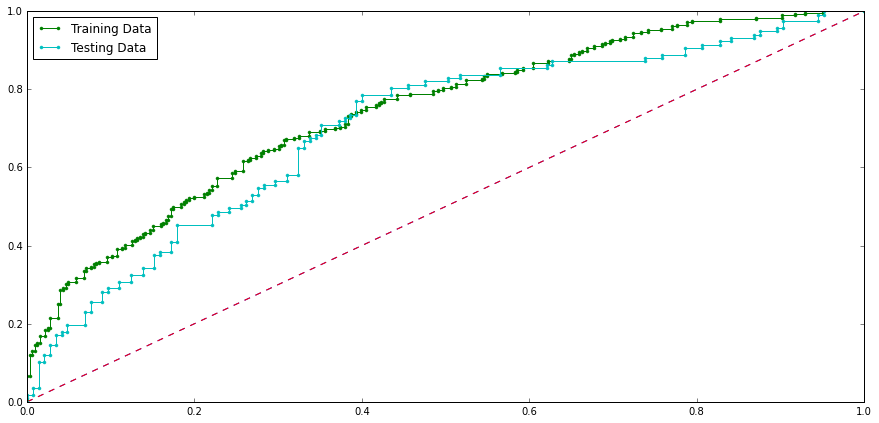

In [99]:
# predict probabilities
plt.figure(figsize=(15,7))

probs_1 = model_final_lda.predict_proba(X_train_lda)
# keep probabilities for the positive outcome only
probs_1 = probs_1[:, 1]
# calculate AUC
train_auc_lda = roc_auc_score(y_train_lda, probs_1)
print('AUC for Training Data: %.3f' % train_auc_lda)
# calculate roc curve
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y_train_lda, probs_1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_lda, train_tpr_lda, marker='.',label = 'Training Data');


# predict probabilities
probs_2 = model_final_lda.predict_proba(X_test_lda)
# keep probabilities for the positive outcome only
probs_2 = probs_2[:, 1]
# calculate AUC
test_auc_lda = roc_auc_score(y_test_lda, probs_2)
print('AUC for testing Data: %.3f' % test_auc_lda)
# calculate roc curve
test_fpr_lda, test_tpr_lda, test_thresholds_lda = roc_curve(y_test_lda, probs_2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_lda, test_tpr_lda, marker='.',label='Testing Data')

plt.legend(loc='best')
plt.show()

## Model Comparison - Logistic Regression + LDA

In [100]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[accuracy_train,train_auc_lr,train_recall_lr,train_precision_lr,train_f1_lr],
        'LR Test':[accuracy_test,test_auc_lr,test_recall_lr,test_precision_lr,test_f1_lr],
        'LDA Train':[accuracy_lda_train,train_auc_lda,train_recall_lda,train_precision_lda,train_f1_lda],
        'LDA Test':[accuracy_lda_test,test_auc_lda,test_recall_lda,test_precision_lda,test_f1_lda]},index=index)   
                     
round(data,3)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.680,0.645,0.672,0.641
AUC,0.743,0.705,0.742,0.703
Recall,0.570,0.570,0.560,0.560
Precision,0.690,0.610,0.680,0.610
F1 Score,0.630,0.590,0.610,0.580


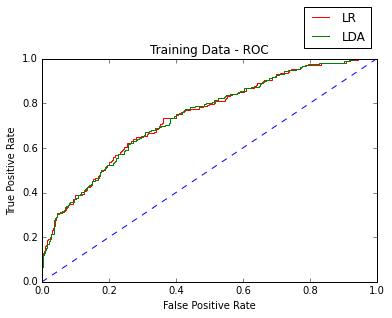

In [101]:
# Training LR + LDA
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr,color='red',label="LR")
plt.plot(train_fpr_lda,train_tpr_lda,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Data - ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

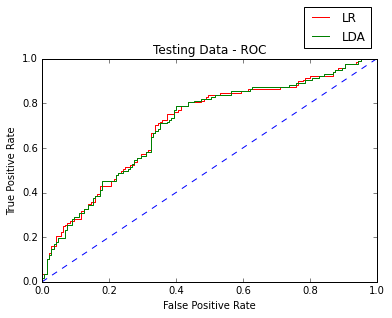

In [102]:
# Testing LR + LDA
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr,color='red',label="LR")
plt.plot(test_fpr_lda,test_tpr_lda,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Data - ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [103]:
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
%matplotlib inline 
import math
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Checking with different cutoff values for LDA ( An extra work to check the validity of different cutoffs)

0.1 

Accuracy Score 0.4918
F1 Score 0.6461 

Confusion Matrix


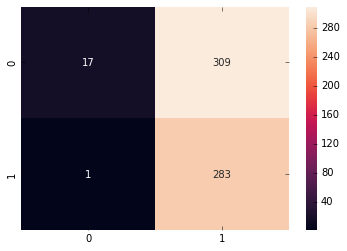

0.2 

Accuracy Score 0.5361
F1 Score 0.6627 

Confusion Matrix


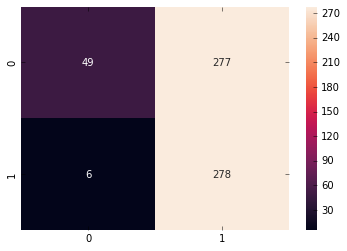

0.3 

Accuracy Score 0.5984
F1 Score 0.6738 

Confusion Matrix


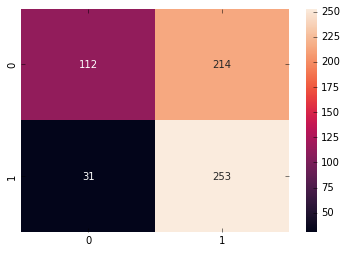

0.4 

Accuracy Score 0.6672
F1 Score 0.6762 

Confusion Matrix


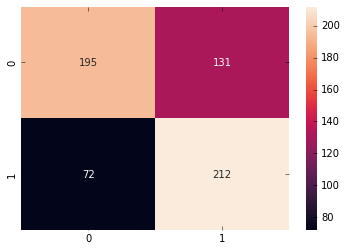

0.5 

Accuracy Score 0.6721
F1 Score 0.6124 

Confusion Matrix


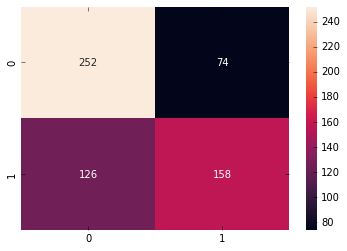

0.6 

Accuracy Score 0.659
F1 Score 0.5357 

Confusion Matrix


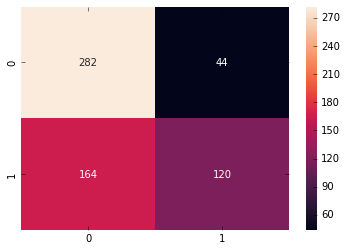

0.7 

Accuracy Score 0.6475
F1 Score 0.4557 

Confusion Matrix


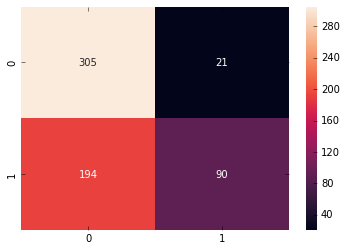

0.8 

Accuracy Score 0.6
F1 Score 0.2695 

Confusion Matrix


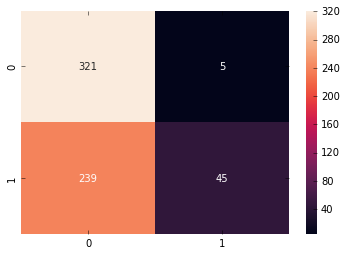

0.9 

Accuracy Score 0.5426
F1 Score 0.0346 

Confusion Matrix


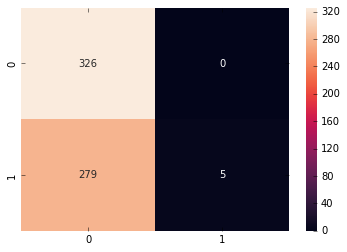

In [104]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train_lda)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train_lda,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train_lda,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train_lda,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

# The above result shown that a cut off of 0.4 works well when it comes to having both high Accuracy and F1 scores(others have one higher and the other lower)

In [105]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

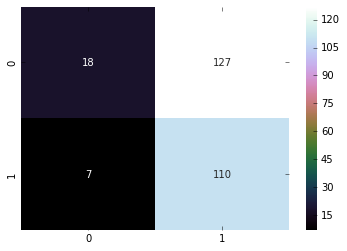

In [106]:
sns.heatmap((metrics.confusion_matrix(y_test_lda,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='cubehelix');

## Custom vs Default classification report

In [107]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test_lda,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test_lda,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.72      0.12      0.21       145
           1       0.46      0.94      0.62       117

    accuracy                           0.49       262
   macro avg       0.59      0.53      0.42       262
weighted avg       0.61      0.49      0.39       262
 



# 2.4 Inference: Basis on these predictions, what are the insights and recommendations. => Answers provided in Business Report